In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import math

# Ex1

In [2]:
def PolX(x, X, i):
    match i:
        case 0:
            return (x - X[1])*(x - X[2])/((X[0] - X[1])*(X[0] - X[2]))
        case 1:
            return (x - X[0])*(x - X[2])/((X[1] - X[0])*(X[1] - X[2]))
        case 2:
            return (x - X[0])*(x - X[1])/((X[2] - X[0])*(X[2] - X[1]))

N = 3
X = [1,2,3]
Y = [1,4,9]

V = np.zeros((N,N))

for x in X:
    for i in range(N):
        V[X.index(x), i] = PolX(x, X, i)

print(V)

c = np.linalg.solve(V,Y)

print(c)

#|P0(X0)    P0(X1)    P0(X2)|   |C0|   |Y0|
#|P1(X0)    P1(X1)    P1(X2)| * |C1| = |Y1|
#|P2(X0)    P2(X1)    P2(X2)|   |C2|   |Y2|

#|(X0-X1)(X0-X2)/(X0-X1)(X0-X2)    (X1-X1)(X1-X2)/(X0-X1)(X0-X2)    (X2-X1)(X2-X2)/(X0-X1)(X0-X2)|   |C0|   |Y0|
#|(X0-X0)(X0-X2)/(X1-X0)(X1-X2)    (X1-X0)(X1-X2)/(X1-X0)(X1-X2)    (X2-X0)(X2-X2)/(X1-X0)(X1-X2)| * |C1| = |Y1|
#|(X0-X0)(X0-X1)/(X2-X0)(X2-X1)    (X1-X0)(X1-X1)/(X2-X0)(X2-X1)    (X2-X0)(X2-X1)/(X2-X0)(X2-X1)|   |C2|   |Y2|

#|1    0    0|   |C0|   |Y0|
#|0    1    0| * |C1| = |Y1|
#|0    0    1|   |C2|   |Y2|

#|C0|   |Y0|
#|C1| = |Y1|
#|C2|   |Y2|

#A vantagem de usar esse tipo de base é que os coeficientes podem ser facilmente calculados, pois equivalem aos seus respectivos Y
#Exemplo usado [(1,1),(2,4)(3,9)]:
#https://www.wolframalpha.com/input?i2d=true&i=plot+1+*+%5C%2840%29%5C%2840%29x-2%5C%2841%29Divide%5B%5C%2840%29x-3%5C%2841%29%2C%5C%2840%291-2%5C%2841%29%5C%2840%291-3%5C%2841%29%5D%5C%2841%29+%2B+4*%5C%2840%29%5C%2840%29x-1%5C%2841%29Divide%5B%5C%2840%29x-3%5C%2841%29%2C%5C%2840%292-1%5C%2841%29%5C%2840%292-3%5C%2841%29%5D%5C%2841%29+%2B+9*%5C%2840%29%5C%2840%29x-1%5C%2841%29Divide%5B%5C%2840%29x-2%5C%2841%29%2C%5C%2840%293-1%5C%2841%29%5C%2840%293-2%5C%2841%29%5D%5C%2841%29+from+x+%3D+0+to+3

[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]
[1. 4. 9.]


# Ex2

[-5.  -4.  -3.  -2.  -1.5 -1.  -0.5  0.   0.5  1.   2.   3.   4.   5. ] 14


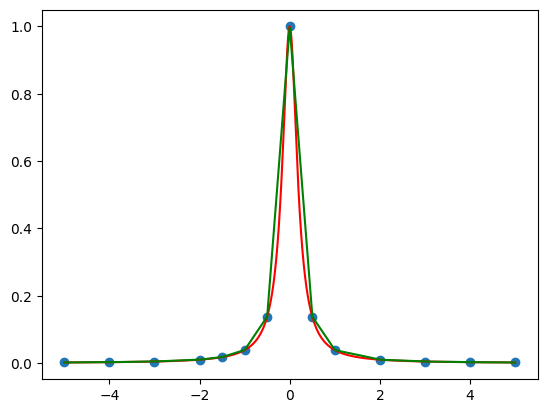

In [3]:
#Original
def R(x):
    return 1.0/(1.0 + 25.0*x**2)

# Interpolating points
xi = np.array([-5,-4,-3,-2,-1.5,-1,-0.5, 0, 0.5, 1, 2, 3, 4, 5])

print(xi, len(xi))
yi = R(xi)
# Define a set of points to evaluate the functions 
xeval = np.linspace(-5, 5, 2000) 
yeval = R(xeval) 
# Compute the piecewise liner polynomial 
ylin = interp1d(xi, yi, kind='linear') 
# Plot everything 
plt.plot(xi, yi, 'o', xeval, yeval, '-r', xeval, ylin(xeval), '-g')
plt.show()

[-5.00000000e+00 -3.00000000e+00 -1.64312547e+00 -7.73102930e-01
 -2.81743050e-01 -6.08564989e-02 -2.25394440e-03  2.25394440e-03
  6.08564989e-02  2.81743050e-01  7.73102930e-01  1.64312547e+00
  3.00000000e+00  5.00000000e+00] 14


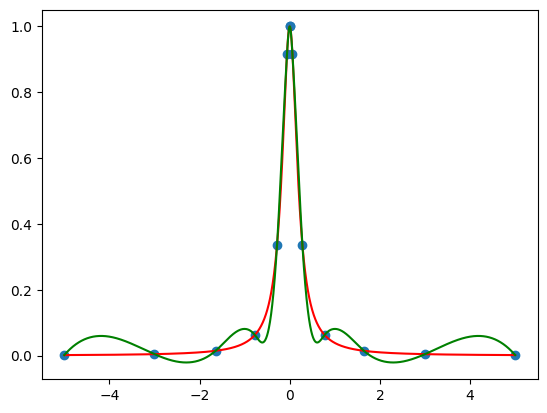

In [4]:
def R(x):
    return 1.0/(1.0 + 25.0*x**2)

# Interpolating points
xi = np.linspace(-(3)**(1/3), (3)**(1/3), 12, dtype=float)
xi = xi**3
xi = np.append(xi, [-5, 5])
xi = np.unique(xi)
xi = np.sort(xi)

print(xi, len(xi))
yi = R(xi)
# Define a set of points to evaluate the functions 
xeval = np.linspace(-5, 5, 2000) 
yeval = R(xeval) 
# Compute the piecewise liner polynomial 
ylin = interp1d(xi, yi, kind='cubic') 
# Plot everything 
plt.plot(xi, yi, 'o', xeval, yeval, '-r', xeval, ylin(xeval), '-g')
plt.show()

# Ex4

In [5]:
arq = open("data.txt", "r")
dadosS = arq.read().split("\n")
arq.close()

for i in range(len(dadosS)):
    if dadosS[i] == "":
        dadosS.pop(i)

dados = np.zeros((len(dadosS), 4))

for i in range(len(dadosS)):
    dados[i] = dadosS[i].split(" ")

dadosOrdenados = dados[dados[:, 0].argsort()]
dadosOrdenados2 = dados[dados[:, 1].argsort()]

#print(dados)
#print(dadosOrdenados)

N = len(dados)

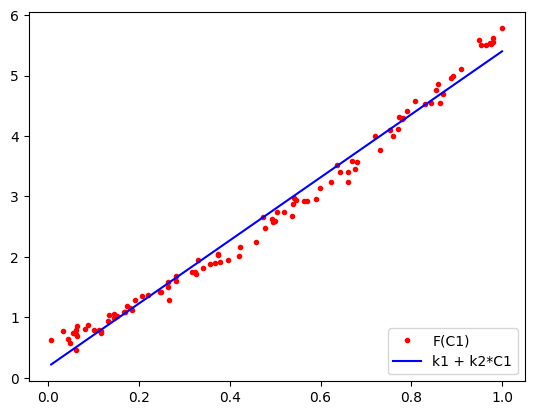

In [6]:
#Caso 1
A = np.zeros((N, 2))
A[:,0] = 1
A[:,1] = dados[:,0]

transA = np.transpose(A)
B = transA.dot(A)

y = np.zeros(N)
y[:] = dados[:,2]

Consts = np.linalg.solve(B, (transA @ y))

x = np.linspace(min(dados[:,0]), max(dados[:,0]), N)

Ks = [Consts[1], Consts[0]]
y = np.polyval(Ks, x)

linha = plt.plot(dadosOrdenados[:,0], dadosOrdenados[:,2], '.r')
plt.plot(x, y, '-b')
plt.legend(["F(C1)", "k1 + k2*C1"], loc="lower right")
plt.show()

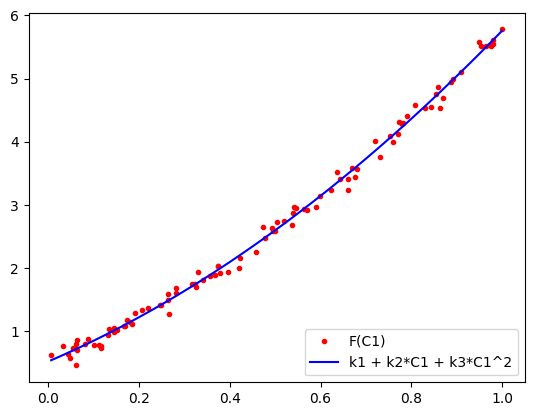

In [7]:
#Caso 2
A = np.zeros((N, 3))
A[:,0] = 1
A[:,1] = dados[:,0]
A[:,2] = dados[:,0]**2

transA = np.transpose(A)
B = transA.dot(A)

y = np.zeros(N)
y[:] = dados[:,2]

Consts = np.linalg.solve(B, (transA @ y))

x = np.linspace(min(dados[:,0]), max(dados[:,0]), N)

Ks = [Consts[2], Consts[1], Consts[0]]
y = np.polyval(Ks, x)

plt.plot(dadosOrdenados[:,0], dadosOrdenados[:,2], '.r')
plt.plot(x, y, '-b')
plt.legend(["F(C1)", "k1 + k2*C1 + k3*C1^2"], loc="lower right")
plt.show()

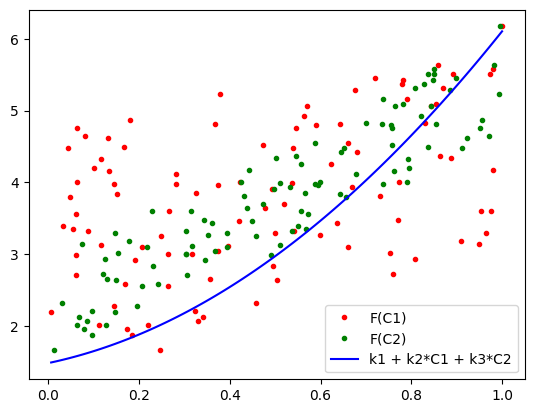

In [8]:
#Caso 3
A = np.zeros((N, 3))
A[:,0] = 1
A[:,1] = dados[:,0]
A[:,2] = dados[:,1]

transA = np.transpose(A)
B = transA.dot(A)

y = np.zeros(N)
y[:] = dados[:,3]

Consts = np.linalg.solve(B, (transA @ y))

x = np.linspace(min(dados[:,0]), max(dados[:,0]), N)

Ks = [Consts[2], Consts[1], Consts[0]]
y = np.polyval(Ks, x)

plt.plot(dadosOrdenados[:,0], dadosOrdenados[:,3], '.r')
plt.plot(dadosOrdenados2[:,1], dadosOrdenados2[:,3], '.g') 
plt.plot(x, y, '-b')
plt.legend(["F(C1)", "F(C2)", "k1 + k2*C1 + k3*C2"], loc="lower right")
plt.show()

# Ex 5

In [14]:
def Media(x1, x2):
    return (x1 + x2)/2

def CalcularIntegrais(N, a, b, funcao):
    res = []

    for n in N:
        sumPM = 0
        sumT = 0
        sumS = 0
        dist = (b-a)/n
        for x in a + np.arange(0, n+1) * dist:
            sumPM += Media(funcao(x-dist), funcao(x))
            sumT += funcao(x-dist) + funcao(x)
            sumS += funcao(x-dist) + 4 * funcao(Media(x-dist, x)) + func(x)

        res.append([dist * sumPM, dist/2 * sumT, dist/6 * sumS])

    return np.array(res)

In [ ]:
def func(x):
    return 4/(1 + x**2)

qtd = 500
N = np.linspace(1, 10**3, qtd, dtype=int)

erros = CalcularIntegrais(N, 0, 1, func)

for i in range(len(erros)):
    for j in range(len(erros[0])):
        erros[i,j] = abs(math.pi - erros[i,j])

plt.loglog(N, erros[:,0], "-r")
plt.loglog(N, erros[:,1], "-g")
plt.loglog(N, erros[:,2], "-b")
plt.title("Precisão")
plt.legend(["Regra do ponto médio", "Regra do trapézio", "Regra de Simpson"], loc="upper right")
plt.show()

#Todos os métodos se provaram igualmente precisos, mas a regra do trapézio acaba por ser mais eficiente, por realizar menos operações por N

# Ex 6

In [10]:
def Assembly(conec, C):
    #Procura o maior valor entre o maior valor de cada coluna, assim encontrando o tamanho
    nv = max([max(conec[:,0]), max(conec[:,1])])
    #Quantidade de canos = número de ligações = tamanho da lista de Condutâncias
    nc = len(C)
    A = np.zeros(shape=(nv,nv))
    #Para cada cano
    for k in range(nc):
        #Pega os nós conectados
        n1 = conec[k, 0] - 1
        n2 = conec[k, 1] - 1

        #Salva na matriz A os valores da condutância do cano de acordo com os nós respectivos
        A[n1, n1] += C[k]
        A[n1, n2] += -C[k]
        A[n2, n1] += -C[k]
        A[n2, n2] += C[k]

    return A

#Para calcular as pressões de cada nó e vazões de cada cano
def SolveNetwork(conec, C, natm, nB, QB, imprimir):
    #Procura o maior valor entre o maior valor de cada coluna, assim encontrando o tamanho
    nv = max([max(conec[:,0]), max(conec[:,1])])

    #Pega a matriz A
    Atilde = Assembly(conec, C)
    #Altera a linha do nó de saída da massa
    Atilde[natm-1, :] = 0
    Atilde[natm-1, natm-1] = 1

    #Cria a matriz de variação da massa
    b = np.zeros(shape=nv)
    #Salva em qual nó está entrando massa externa
    b[nB-1] = QB

    #Resolve a matriz, assumindo Ã como dados, b como resultados e calculando o vetor de pressões intermediário
    pressure = np.linalg.solve(Atilde, b)

    #Para não desacelerar desnecessariamente o último exercício
    if imprimir:
        print("Ã = ", Atilde, "\n\nb = ", b, "\n\nPressão = ", pressure)
    return pressure

def CalcularPotencia(p, D, K):
    pT = np.transpose(p)
    Dt = np.transpose(D)
    aux = Dt.dot(K).dot(D)
    W = pT.dot(aux).dot(p)
    return W

def GeraRede(nx,ny, largura):
    nv = nx*ny
    nc = (nx-1)*ny + (ny-1)*nx
    dx = largura/nx
    
    coord = np.zeros(shape=(nv,2))

    for i in range(nx):
        for j in range(ny):
            ig = i + j*nx
            coord[ig,0] = i
            coord[ig,1] = j

    conec = np.zeros(shape=(nc,2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny):
        for i in range(nx-1):
            k = j*(nx-1) + i
            conec[k,0] = j*nx + i
            conec[k,1] = j*nx + i+1
            #C[k] = CH
            C[k] = 2.3 + 10*pow(math.e, -pow((i * dx) - 5, 2))
            

    # Loop sobre canos verticais
    for i in range(nx):
        for j in range(ny-1):
            k = (nx-1)*ny + j*nx + i
            conec[k,0] = i + j*nx
            conec[k,1] = i + (j+1)*nx
            #C[k] = CV
            C[k] = 1.8 + 10*pow(math.e, -pow((i * dx) - 5, 2))

    return nv, nc, conec, C, coord

def PlotPressure(nx, ny, pressure):
    x = np.arange(0, nx, 1)
    y = np.arange(0, ny, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (ny,nx)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    cp = plt.contourf(X, Y, Z, cmap='jet')
    cb = plt.colorbar(cp)
    plt.show()

def PlotPressureAsSurface(nx, ny, pressure):
    x = np.arange(0, nx, 1)
    y = np.arange(0, ny, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (ny,nx)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, Z, cmap='jet', edgecolor=None)
    ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
    ax.view_init(elev=30., azim=45)
    plt.show()

In [11]:
def FormarK(C):
    nc = len(C)
    K = np.zeros(shape=(nc,nc))
    #Salva o valor de cada condutância de acordo com o cano relacionado
    for k in range(nc):
        K[k, k] = C[k]

    return K

#Calcular a matrix de fluxo
def FormarD(conec, C):
    #Procura o maior valor entre o maior valor de cada coluna, assim encontrando o tamanho
    nv = max([max(conec[:,0]), max(conec[:,1])])
    nc = len(C)

    #Como a matriz define quais nós são a entrada e saída de cada cano,
    #ela possui uma linha pra cada cano, uma coluna pra cada nó
    D = np.zeros(shape=(nc,nv))
    for k in range(nc):
        #Pega os nós do cano
        n1 = conec[k, 0] - 1
        n2 = conec[k, 1] - 1

        D[k,n1] = 1
        D[k,n2] = -1
    
        #Para cada cano
        #for j in range(nv):
        #    #Salva se o fluxo entra ou sai do nó
        #    if j == n1:
        #        D[k, j] = 1
        #    else: 
        #        if j == n2:
        #            D[k, j] = -1

    return D

def CalcularPotencia(p):
    K = FormarK(C)
    D = FormarD(conec, C)
    
    pT = np.transpose(p)
    Dt = np.transpose(D)
    aux = Dt.dot(K).dot(D)
    W = pT.dot(aux).dot(p)
    return W

In [12]:
n, m, largura = 8, 9, 10
nv, nc, conec, C, coord = GeraRede(n, m, largura)
#Este trecho é para correção dos valores, pois o código dos outros exercícios foi adaptado para o primeiro nó ser o 1, não o 0
conec[:][:] += 1

QB = 3
#Estas duas variáveis estão 1 à mais pelo mesmo motivo anterior
nAtm = n*m
nB = 1

p = SolveNetwork(conec, C, nAtm, nB, QB, False)

#PlotPressure(n, m, p)
#PlotPressureAsSurface(n, m, p)

[[136.08666319 136.08666319 115.03125563]
 [113.40555266 113.40555266  95.47177343]
 [105.84518248 105.84518248  88.97662617]
 [102.0649974  102.0649974   85.73706293]
 [ 99.79688634  99.79688634  83.79646026]]
[[90.73351457 90.73351457 76.06856814]]


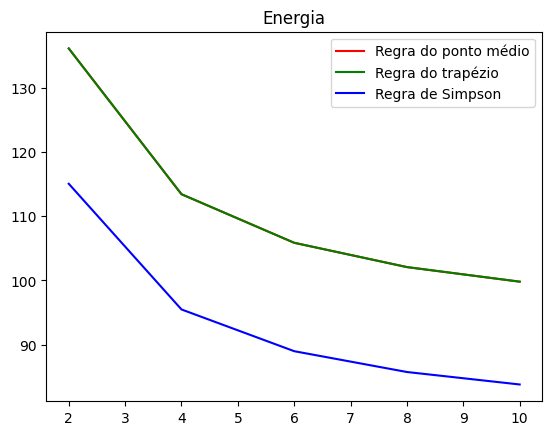

In [13]:
def Potencia(x):
    K = FormarK(C)
    D = FormarD(conec, C)
    return CalcularPotencia(p)

N = [2, 4, 6, 8, 10]
energias = CalcularIntegrais(N, 1, 10, Potencia)

print(energias)
print(CalcularIntegrais([10000], 1, 10, Potencia))

plt.plot(N, energias[:,0], "-r")
plt.plot(N, energias[:,1], "-g")
plt.plot(N, energias[:,2], "-b")
plt.title("Energia")
plt.legend(["Regra do ponto médio", "Regra do trapézio", "Regra de Simpson"], loc="upper right")
plt.show()